<a href="https://colab.research.google.com/github/BinarPlatinumChallenge/Sentiment-Analysis/blob/main/NN-LSTM_collabs/2_NeuralNetwork_TF_IDF_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPARE DATASET**

In [ ]:
# mounting to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install libraries for stopwords

!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.6 MB/s eta 0:00:00


## **Download Dataset**

Raw data traning can be downloaded with this [link](https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view)

Raw data set hates speech, file kamus alay dan stopwords can be downloaded in this [link](https://drive.google.com/drive/folders/1qm50pKAnzGGw9gtk--lmwR758aZOVish) 

In [ ]:
# Libraries to read and analyze data frame
# Read raw dataset used for training the model from google drive

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/train_preprocess.tsv.txt', delimiter='\t', header=0, names=['tweet','sentimen'])

# Eliminated null and duplicated data
df = df.dropna()
df = df.drop_duplicates(ignore_index=True)

In [ ]:
# import library to handle stopwords using NLTK

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import library to handle stopwords using sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
sastrawi_stop_words = stop_factory.get_stop_words()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# merge stopwords dictionary from NLTK, sastrawi, and raw file "stopwordbahasa.csv"
# add {'ya','yg','ga','yuk','dah','sih','gue','nya','nih'} in stopwords dict set
# eliminated word "tidak" from stopwords dict set to avoid changing the meaning of the sentence 

stopword_dict = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/stopwordbahasa.csv', header=None, names=['stopword'], encoding='latin-1')
stopword_dict = list(stopword_dict['stopword']) + sastrawi_stop_words + stop_words + ['ya','yg','ga','yuk','dah','sih','gue','nya','nih']
stopword_dict = list(dict.fromkeys(stopword_dict))
stopword_dict = filter(lambda word: word !='tidak', stopword_dict)
stopword_dict = list(stopword_dict)
print(len(stopword_dict))

781


In [ ]:
# import library to handle stopwords using NLTK

import re
def lowercase(text): #1
  text = text.strip() 
  return text.lower()

def remove_unnecessary_char(text): #2
  text = re.sub('\\+n', ' ', text) # remove every new line
  text = re.sub('\n'," ",text) # remove every single new line
  text = re.sub('\\+', ' ', text) # remomove unessessary character
  text = re.sub(r'\brt\b','', text) # r'\b...\b to remove certain word, only at the beginning or end of the word for 'rt' 
  text = re.sub(r'\buser\b','', text) # r'\b...\b to remove certain word, only at the beginning or end of the word for 'user'
  text = re.sub(r'\bnurl\b','', text)
  text = re.sub('&lt;/?[a-z]+&gt;', '', text) #remove special characters
  text = re.sub('&amp', '', text) #remove ampersand character
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # remomove unessessary character 
  text = re.sub(':', ' ', text) # remomove special character 
  text = re.sub(';', ' ', text) 
  text = re.sub('  +', ' ', text) 
  text = re.sub(r'pic.twitter.com.[\w]+', '', text) # remomove unessessary character 
  text = re.sub(r'[^\x00-\x7F]+',' ', text)  
  text = re.sub(r'‚Ä¶', '', text)  
  to_delete = ['hypertext', 'transfer', 'protocol', 'over', 'secure', 'socket', 'layer', 'dtype', 'tweet', 'name', 'object'
                 ,'twitter','com', 'pic'] # delete another unessessary words
  for word in to_delete: 
      text = re.sub(word,'', text) # remove extra space
      text = re.sub(word.upper(),' ',text)
  return text

def remove_nonaplhanumeric(text): #3
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_emoticon_byte(text): #4
    text = text.replace("\\", " ")
    text = re.sub(r'\bx..', ' ', text)
    text = re.sub(' n ', ' ', text)
    return text

def remove_early_space(text): #5
    if text[0] == ' ':
        return text[1:]
    else:
        return text

def remove_number(text): #6
    text = ''.join([i for i in text if not i.isdigit()])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

# handle special word "tidak" --> "tidak_" to avoid changing the meaning of the sentance

def handleTidak(text): #7
    words = text.split(' ')
    text = ' '.join(['tidak_' if words[i] == 'tidak' else words[i] for i in range(len(words))])
    text = text.strip()
    text = text.replace('tidak_ ','tidak_')
    return text


In [ ]:
# text normalization 

def normalize_alay(text): #8
    alay_dict = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/new_kamusalay.csv', names=['original', 'replacement'], encoding='latin-1')
    alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
    normalize_text = ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
    return normalize_text

def remove_stopword(text): #9
    text = ' '.join(['' if word in stopword_dict else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text): #10
    return stemmer.stem(text)

In [ ]:
# text cleansing process

def cleanse_text(text):
    text = lowercase(text) #1
    text = remove_unnecessary_char(text) #2
    text = remove_nonaplhanumeric(text) #3
    text = remove_emoticon_byte(text) #4
    text = remove_early_space(text) #5
    text = remove_number(text) #6
    text = normalize_alay(text) #8
    text = remove_stopword(text) #9
    text = stemming(text) #10
    text = handleTidak(text) #7
    return text


In [ ]:
# check cleansing result

text = 'Budaya kafir bersungguh, klau hal2 islam tidak diendahkan...'
cleaned_text = cleanse_text(text)
cleaned_text

'budaya kafir sungguh islam tidak_indah'

In [ ]:
# applied data cleansing process into dataframe

df['cleaned_tweet'] = df.tweet.apply(cleanse_text)

In [ ]:
# save clean dataset to google drive

df.to_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/train_cleaned_preprocess.csv', header = True)
df.head()

,tweet,sentimen,cleaned_tweet
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah partai diwlh ...
1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
4,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall kasir suasan...


In [ ]:
# read cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/train_cleaned_preprocess.csv', header=0)

# drop NaN and dulicate data
df = df.dropna()
df = df.drop_duplicates(ignore_index=True)

In [ ]:
df.head(10)

,Unnamed: 0,tweet,sentimen,cleaned_tweet
0,0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah partai diwlh ...
1,1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
2,2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
3,3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
4,4,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall kasir suasan...
5,5,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit baca tidak_untung rugi
6,6,"tempat unik , bagus buat foto , makanan enak ,...",positive,unik bagus foto makan enak pegawai ramah bersi...
7,7,saya bersama keluarga baru saja menikmati peng...,positive,keluarga nikmat alam kuliner senang rm sari su...
8,8,bersyukur,positive,syukur
9,9,simcard indosat inaktiv gara-gara lupa isi pul...,negative,simcard indosat inaktiv gara gara lupa isi pul...


## **Cheking Cleansing Result**

In [ ]:
# checking the frequency of words

new_df = df.cleaned_tweet.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df.head(10)

,Word,Frequency
0,makan,6458
1,enak,3684
2,harga,2001
3,bandung,1746
4,menu,1735
5,banget,1511
6,restoran,1300
7,layan,1260
8,pilih,1260
9,jalan,1013


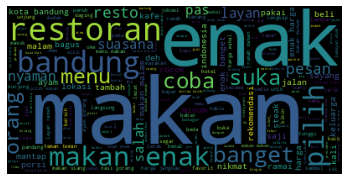

In [ ]:
# checking the frequency of words using matplotlib and WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Feature Extraction : TF-IDF

In [ ]:
# Convert a given array to an ordinary list with the same items, elements, or values

data_clean = df.cleaned_tweet.tolist()

In [ ]:
# TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features

from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction processing
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(data_clean)

# result definition 
text_transform = tfidf_vect.fit_transform(data_clean)
print("Feature Tf-Idf extraction : Done")

Feature Tf-Idf extraction : Done


In [ ]:
# Library to converting a Python object into a byte stream to store it in a file/database
import pickle 

# Saved feature extraction process
pickle.dump(tfidf_vect, open("/content/drive/MyDrive/CHALLENGE_PLATINUM/tf-idf_feature.pickle", "wb"))

# DATA TRAINING

In [ ]:
# import package to split data train and test

from sklearn.model_selection import train_test_split

# define sentimen classification
sentimen_classes = df.sentimen

In [ ]:
# Split data set for model training (80%) and testing (20%)

X_train, X_test, y_train, y_test = train_test_split(text_transform, sentimen_classes, test_size = 0.2, random_state =0)

In [ ]:
# Import package for model training 

from sklearn.neural_network import MLPClassifier

# define model and choose optimal parameter values
def createModel():
  model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter = 300, activation='relu', solver = 'adam')
  # model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter = 300)
  # model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter = 300,activation = 'relu', solver = 'adam')
  # model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter = 300, activation = 'relu', solver = 'adam')
  return model
model =  createModel()
model.fit(X_train, y_train)

print ("Data Training : Done")

Data Training : Done


In [ ]:
# Saved model training process
pickle.dump(model, open("/content/drive/MyDrive/CHALLENGE_PLATINUM/tfidf_model.pickle", "wb"))

# MODEL TESTING

In [ ]:
from sklearn.metrics import classification_report # Counting true and false predictive result
from sklearn.metrics import accuracy_score # compute the accuracy

test = model.predict(X_test) # Predict using the multi-layer perceptron classifier

print ("Testing : Done")

# print computing result
print(classification_report(y_test, test))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, test))) 

Testing : Done
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81       696
     neutral       0.67      0.64      0.65       226
    positive       0.90      0.92      0.91      1264

    accuracy                           0.85      2186
   macro avg       0.80      0.79      0.79      2186
weighted avg       0.85      0.85      0.85      2186

Accuracy: 0.85


In [ ]:
import numpy as np # library used for working with arrays
from sklearn.neural_network import MLPClassifier # model training
from sklearn.metrics import classification_report # predictive result
from sklearn.metrics import accuracy_score # model accuracy score
from sklearn.model_selection import KFold # cross validation method

kf = KFold(n_splits=5,random_state=None,shuffle=True)

accuracies = []

# define x,y value
y = sentimen_classes
x = text_transform

for iteration, data in enumerate(kf.split(x), start=1):

    data_train   = x[data[0]]
    target_train = y[data[0]]

    data_test    = x[data[1]]
    target_test  = y[data[1]]

    clf = createModel()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

     # for the current fold only 
    accuracy = accuracy_score(target_test,preds)

    print("Training number-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training number- 1
              precision    recall  f1-score   support

    negative       0.76      0.84      0.80       653
     neutral       0.85      0.56      0.68       244
    positive       0.90      0.91      0.90      1289

    accuracy                           0.85      2186
   macro avg       0.84      0.77      0.79      2186
weighted avg       0.85      0.85      0.85      2186

Training number- 2
              precision    recall  f1-score   support

    negative       0.85      0.75      0.79       717
     neutral       0.64      0.63      0.64       215
    positive       0.87      0.93      0.90      1254

    accuracy                           0.84      2186
   macro avg       0.79      0.77      0.78      2186
weighted avg       0.84      0.84      0.84      2186

Training number- 3
              precision    recall  f1-score   support

    negative       0.84      0.77      0.80       686
     neutral       0.69      0.63      0.66       227
    positive      

# **Prediction** 

In [ ]:
# Testing model prediction

original_text =  '''
disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'
'''

# Feature Extraction_   ganti jadi transform
text = tfidf_vect.transform([cleanse_text(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]

print("Tweet clean:")
print(cleanse_text(original_text))
print()
print("Sentiment:")
print(result)

Tweet clean:
cowok usaha lacak perhati lantas remeh perhati kasih khusus basic cowok bego

Sentiment:
negative


# Evaluation using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


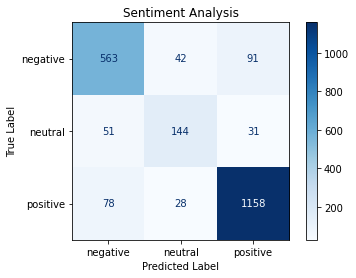

In [ ]:

cm = confusion_matrix(y_test, test)
color = 'black'
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Sentiment Analysis', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()